### Bistable wilson and cowan like model

from : https://elifesciences.org/articles/22425#fig5

In [1]:
# for fast array manipulation
import numpy as np
# for plotting
import matplotlib.pyplot as plt
# for numerical ODE integration
from scipy.integrate import solve_ivp
# to display plots in-line
%matplotlib inline
plt.style.use('ggplot')

In [2]:
def sigmoid(x, a, thr):
    return 1 / (1 + np.exp(-a * (x - thr)))

def threshold_linear(x,thr,gain):
    thresholded = x-thr
    if thresholded > 0:
        return gain*thresholded
    else:
        return 0 

vthreshold_linear = np.vectorize(threshold_linear)

In [3]:
# Time constant of neural pop in seconds
tau_e = 0.010
tau_i = 0.002
tau_a = 0.5
# Synapse strength
j_ee = 5
j_ei = 1
j_ie = 10
j_ii = 0.5
# Adaptation parameter
beta = 6
tau_a = 0.5
# threshold and gains
g_e = 1
g_i = 4
thr_i = 25
thr_e = 3 # to play with
# Input currents
I_e = 6

In [4]:
# this function returns the right hand side of the Wilson-Cowan equation
# (both, in a 2-vector)
def rate_model(t,y):
    E = y[0]
    E2 = y[1]
    I = y[2]
    A = y[3]
    A2 = y[4]


    y1 = (-E + vthreshold_linear(j_ee*E-j_ei*I-A+I_e,thr_e, g_e))/tau_e
    y2 = (-E2 + vthreshold_linear(j_ee*E2-j_ei*I-A2+I_e,thr_e, g_e))/tau_e
    y3 = (-I + vthreshold_linear(j_ie*E+j_ie*E2-j_ii*I,thr_i,g_i))/tau_i
    y4 = (-A + beta*E)/tau_a
    y5 = (-A2 + beta*E2)/tau_a

    return [y1,y2,y3,y4,y5]


In [5]:
# simulation duration and step size
#time = np.linspace(0, 750, 40000)

# starting point, hopefully inside the basin of attraction of our attractor
E0, E20, I0, A0, A20  = 0, 0, 0, 10, 0  # try cha nging this

# find the solution with scint.odeint
odesol = solve_ivp(rate_model,[0,40], [E0, E20, I0, A0, A20])

# separate the two solutions
exc_ts, exc2_ts, inh_ts, a_ts, a2_ts = odesol.y

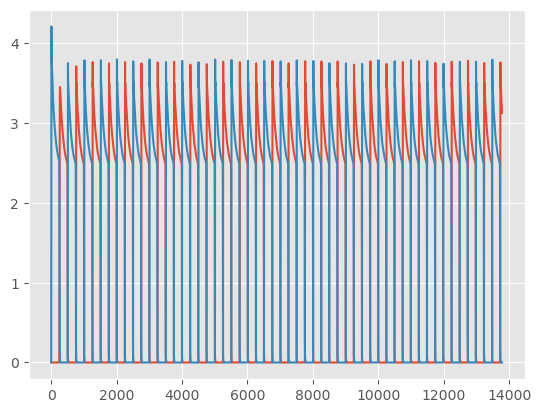

In [6]:
plt.plot(exc_ts)
plt.plot(exc2_ts)

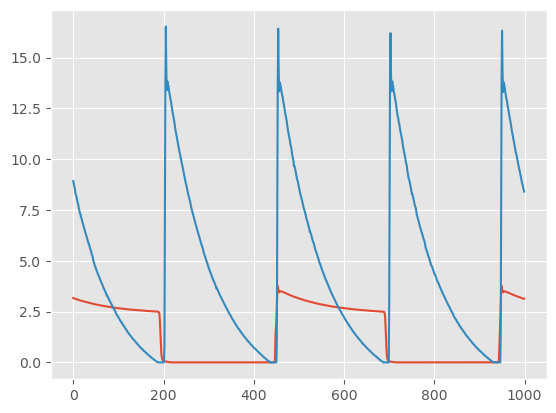

In [7]:
plt.plot(exc_ts[-1000:]);
plt.plot(inh_ts[-1000:]);

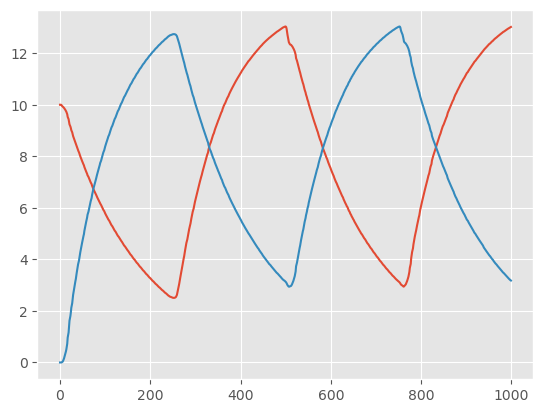

In [12]:
plt.plot(a_ts[:1000])
plt.plot(a2_ts[:1000])